In [3]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

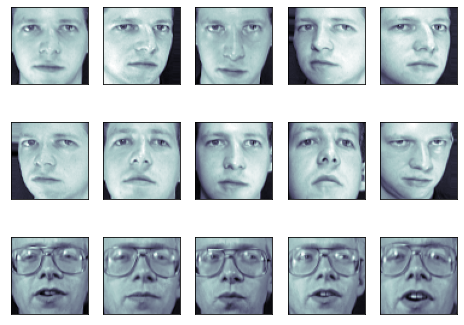

In [33]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(faces.images[i],cmap=plt.cm.bone)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target)
y_test

array([27,  9, 28, 12, 18, 23, 31, 20, 32, 28,  0, 38, 38, 13,  1, 32, 33,
       23,  0,  8, 11, 23,  7,  5, 35, 25,  9, 31, 30, 35, 16, 36, 26, 30,
       20, 35, 36, 16, 36, 23, 37, 17, 27, 30, 13, 21, 33,  6, 27, 10, 15,
        9, 39, 11,  7, 24,  7, 33,  9, 29, 23, 21, 13, 17, 15, 25,  6, 10,
       27, 25,  3, 30, 29, 26, 28, 13, 17, 13,  8,  0, 34, 39, 36,  5, 36,
       29, 37,  8,  7, 31, 30, 13, 35, 14,  4, 18,  2,  3, 33,  4])

Decomposistion Step


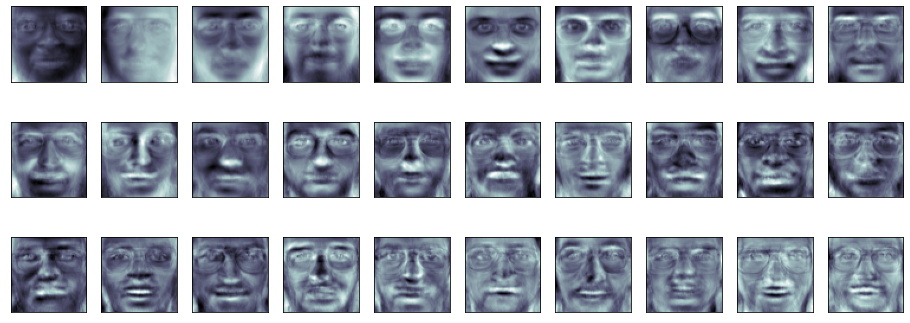

In [21]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=130, whiten=True)
pca.fit(X_train)
# plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)
fig = plt.figure(figsize=(16,6))
for i in range(30):
  ax = fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
            cmap=plt.cm.bone)

In [24]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)

(300, 130) (100, 130)


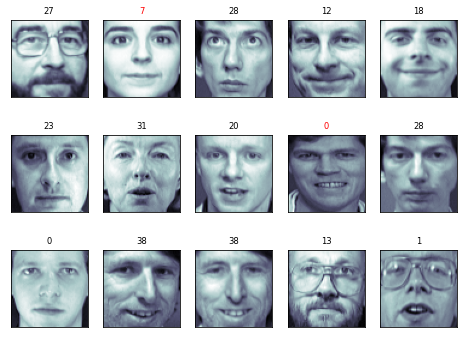

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import numpy as np

gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

# clf = svm.SVC(C=5, gamma=0.001)
# clf.fit(X_train_pca, y_train)

fig = plt.figure(figsize=(8,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape ),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color= color)

In [28]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.75      0.75      0.75         4
           8       1.00      0.67      0.80         3
           9       1.00      0.25      0.40         4
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.25      1.00      0.40         1
          13       1.00      0.50      0.67         6
          14       1.00      1.00      1.00         1
          15       0.67      1.00      0.80         2
          16       1.00      1.00      1.00         2
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gaussian without PCA


In [41]:
nbf = GaussianNB()
nbf.fit(X_train, y_train)
y_pred = nbf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         0
           2       1.00      0.17      0.29         6
           3       1.00      0.33      0.50         6
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         2
           8       0.33      1.00      0.50         1
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.25      0.40         4
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          15       0.50      0.50      0.50         2
          16       0.50      1.00      0.67         1
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Decision Tree without PCA

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)
y_pred = dtf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         1
           7       0.75      0.60      0.67         5
           8       0.67      0.67      0.67         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         2
          11       0.50      0.50      0.50         2
          12       1.00      0.17      0.29         6
          13       0.33      1.00      0.50         2
          14       1.00      0.20      0.33         5
          15       0.50      0.25      0.33         4
          16       0.00      0.00      0.00         0
          17       0.33    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

PipeLining

1) using Gaussian NB

In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca',decomposition.PCA(n_components=130, whiten=True)),('gnb',GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      0.80      0.89         5
           8       0.67      1.00      0.80         2
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         2
          11       1.00      0.67      0.80         3
          12       1.00      0.20      0.33         5
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      0.67      0.80         3
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Using Decision TRee


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1
           2       1.00      0.12      0.22         8
           3       0.50      0.33      0.40         3
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.25      0.33      0.29         3
           8       0.33      0.25      0.29         4
           9       0.00      0.00      0.00         0
          10       1.00      0.50      0.67         4
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.50      0.20      0.29         5
          16       1.00      0.67      0.80         3
          17       0.67    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Using SVC


In [37]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=130, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       0.67      1.00      0.80         4
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Exercises

Ex1 done *above*

EX2

In [49]:
from sklearn import decomposition
from sklearn import datasets
data1 = datasets.load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)

pca = decomposition.PCA(n_components=4, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
# another part is below
# Ex3
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_pred,y_test))

(112, 4) (38, 4)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [50]:
from sklearn.naive_bayes import GaussianNB
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('nb', GaussianNB())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('dt', DecisionTreeClassifier())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [52]:
from sklearn.svm import SVC
clf = Pipeline([('pca', decomposition.PCA(n_components=4, whiten=True)), ('svc', SVC(C=5, gamma=0.001))])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.54      0.88      0.67         8
           2       1.00      0.65      0.79        17

    accuracy                           0.82        38
   macro avg       0.82      0.84      0.81        38
weighted avg       0.88      0.82      0.82        38



Ex2 - remaining

In [62]:
from sklearn import decomposition
from sklearn import datasets
import pandas as pd

data1 = datasets.load_iris()
df = pd.DataFrame(data1)
df.drop(columns=data1.columns[0], axis=1,  inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target)

pca = decomposition.PCA(n_components=4, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape,X_test_pca.shape)
# another part is below
# Ex3
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_pred,y_test))

ValueError: ignored